` WORKERS SALARY PERDICTION MODEL`

In [117]:
# import the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pickle 


In [118]:
# load the the dataset 
df = pd.read_csv('Salary Data.csv')

# check the first rows
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [119]:
# check datainfo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


* `DATA PREPROCESSING `

In [120]:
# check for missing values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [121]:
# drop missing values 
df.dropna(inplace=True)

In [122]:
# check for dulicates
df.duplicated().sum()

49

In [123]:
# drop duplicates
df.drop_duplicates(inplace=True)

* ` EXPLORATORY DATA ANALYSIS (EDA) ` 
The is a crucial step in the data preprocessing 

In [124]:
# stat info 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
Years of Experience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [125]:
# do a value count of the categorical columns
df.value_counts(subset=df['Gender'])

Gender
Male      170
Female    154
Name: count, dtype: int64

In [126]:
df.value_counts(subset=df['Job Title'])

Job Title
Director of Operations                9
Director of Marketing                 8
Senior Marketing Manager              8
Senior Project Manager                7
Senior Business Analyst               6
                                     ..
Junior Designer                       1
Junior Data Scientist                 1
Junior Data Analyst                   1
Junior Customer Support Specialist    1
Web Developer                         1
Name: count, Length: 174, dtype: int64

In [127]:
df.value_counts(subset=df['Education Level'])

Education Level
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_27776\2365192151.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x= 'Education Level', y= 'Salary', data=df, color='blue',hue= 'Education Level')


<Axes: xlabel='Education Level', ylabel='Salary'>

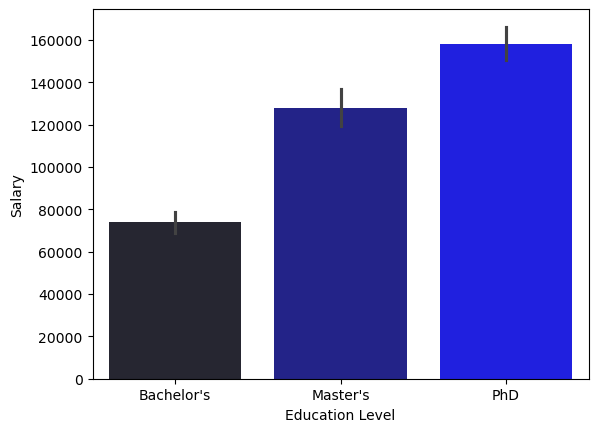

In [128]:
# plot visuals against salary 
sns.barplot(x= 'Education Level', y= 'Salary', data=df, color='blue',hue= 'Education Level')

C:\Users\user\AppData\Local\Temp\ipykernel_27776\1104835753.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(x= 'Gender', y= 'Salary', data=df, color='red',hue= 'Education Level')


<Axes: xlabel='Gender', ylabel='Salary'>

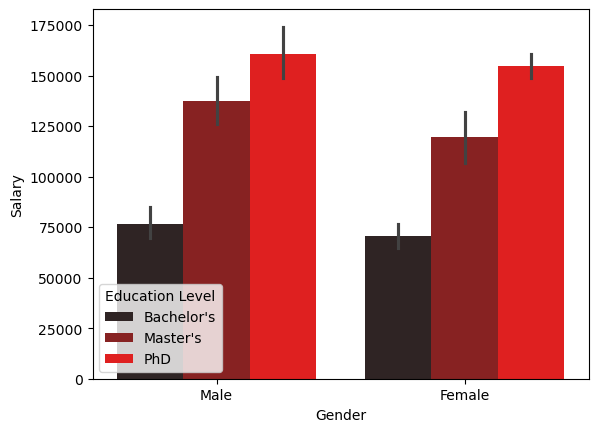

In [129]:
# plot visuals against salary 
sns.barplot(x= 'Gender', y= 'Salary', data=df, color='red',hue= 'Education Level')

<Axes: xlabel='Job Title', ylabel='Salary'>

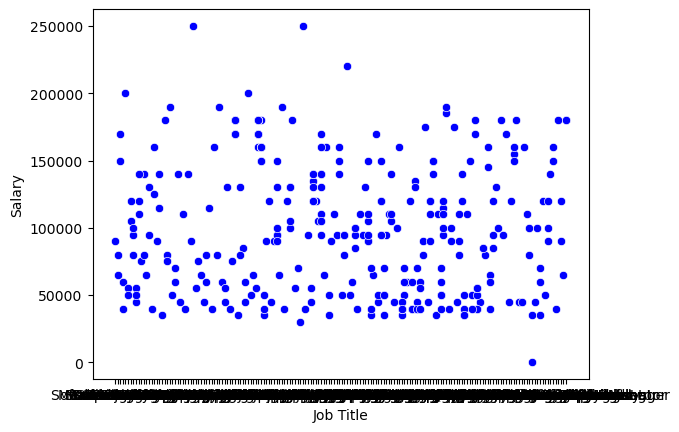

In [130]:
# plot visuals against salary 
sns.scatterplot(x= 'Job Title', y= 'Salary', data=df, color='blue')

<Axes: xlabel='Years of Experience', ylabel='Salary'>

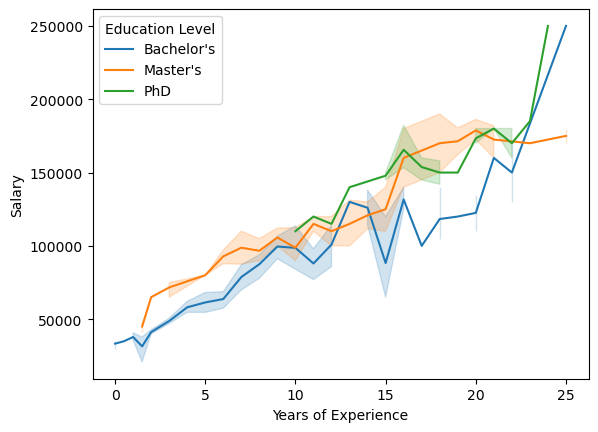

In [131]:
# plot visuals against salary 
sns.lineplot(x= 'Years of Experience', y= 'Salary', data=df, color='green',hue= 'Education Level')

<Axes: xlabel='Age', ylabel='Salary'>

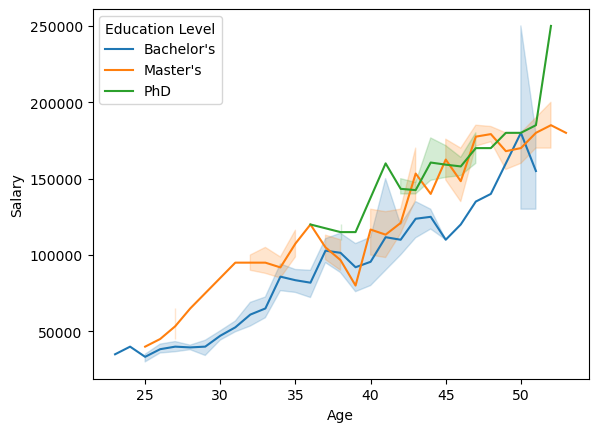

In [132]:
# plot visuals against salary 
sns.lineplot(x= 'Age', y= 'Salary', data=df, color='blue',hue= 'Education Level')

In [133]:
# drop unwanted columns
df.drop(columns=['Gender', 'Job Title'], inplace= True)

In [134]:
# check the new df
df.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


* ` feature Engineering `

In [135]:
# copy df with a new variable name
data = df.copy()

# check data
data.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


In [136]:
# map education level to numercial value
education_mapping = {
    "Bachelor's": 1,
    "Master's": 2,
    "PhD": 3
}

# apply the mapping to df and create a new column 
df['Education Level'] = df['Education Level'].map(education_mapping)
df.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,1,5.0,90000.0
1,28.0,2,3.0,65000.0
2,45.0,3,15.0,150000.0
3,36.0,1,7.0,60000.0
4,52.0,2,20.0,200000.0


<Axes: >

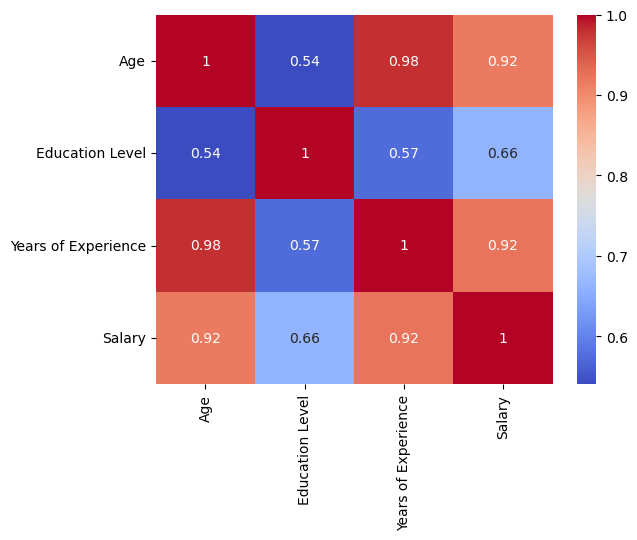

In [137]:
# perform a feature Engineering on the dataset with correellation
# check correllation 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [138]:
# select features and target variable or dependent and independent variables
X = data.drop('Salary', axis=1)
y = data['Salary'] # target variable


# to rewrite the x = data[['Age','Education Level', 'Years of Experience']]


In [139]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shape of the training and testing sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (259, 3)
y_train shape: (259,)
x_test shape: (65, 3)
y_test shape: (65,)


* ` choose the model `

In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# List your feature columns
categorical_features = ['Education Level']
numeric_features = ['Age', 'Years of Experience']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Create the pipeline
pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)

# Now fit as usual
pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Education Level']),
                                                 ('num', 'passthrough',
                                                  ['Age',
                                                   'Years of Experience'])])),
                ('linearregression', LinearRegression())])

In [141]:
# fit model into a pipeline
# specify the pipeline with OneHotEncoder and LinearRegression
pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse_output=False),LinearRegression())

In [142]:
# fit model into a pipeline
# teach the model
pipeline.fit(x_train, y_train)


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('linearregression', LinearRegression())])

In [149]:
# make predictions on the test set 
y_pred = pipeline.predict(x_test)

# check y_pred
y_pred

array([123859.02659632, 132736.89554644,  52793.03050663, 119771.9762291 ,
       106685.77319555, 106685.77319555,  52210.54600717,  61088.41495728,
       175378.78679862,  52183.28976686,  43915.16155651, 129583.44439658,
       106685.77319555, 154118.48303063,  78844.15285752, 172807.82014823,
       101159.33955907, 113190.65965905,  44497.64605598,  43915.16155651,
        78261.66835805,  60505.93045782,  61088.41495728,  27324.39265521,
       195705.49134925,  90095.00429425, 153535.99853117, 169654.36899837,
       177598.63873112,  38190.74375626, 117783.49407817, 167083.40234797,
        89710.50395856, 155283.45202957, 148394.06523038,  54754.25641725,
        83986.08615831,  94852.43725935,  98390.3887449 ,  37196.5026808 ,
        92281.47060896,  49639.57935677, 103730.30620947,  57934.96380742,
        41344.19490612,  52210.54600717, 124057.0107601 ,  46486.12820691,
       154700.9675301 ,  90095.00429425, 160974.48421202,  41344.19490612,
        55363.99715703,  

In [150]:
# evaluate the model
mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MSE: {mse}")
print(f"Test R2: {r2}")
print(f"Test MAE: {mae}")


Test MSE: 247766062.26584977
Test R2: 0.8688920684748019
Test MAE: 11688.977684384005


In [153]:
# test the model with new set of date
new_data = pd.DataFrame([[30, "Master's", 5]],
columns=['Age', 'Education Level', 'Years of Experience'])
# predict thw salary for new data
pipeline.predict(new_data)


array([76075.20204335])

In [146]:
# save the model to a file 
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)